# Принятие решений в бизнесе на основе данных

Оглавление :  
1. [Часть 1. Приоритизация гипотез.](#step1) 

2. [Часть 2. Анализ A/B-теста](#step2)  

    2.1 [График кумулятивной выручки по группам](#step2.1)  
    
    2.2 [График кумулятивного среднего чека по группам](#step2.2) 
    
    2.3 [График относительного изменения кумулятивного среднего чека группы B к группе A](#step2.3) 
    
    2.4 [График кумулятивной конверсии по группам](#step2.4) 
    
    2.5 [График относительного изменения кумулятивной конверсии группы B к группе A](#step2.5) 
    
    2.6 [Точечный график количества заказов по пользователям](#step2.6) 
    
    2.7 [Расчет 95-й и 99-й перцентили количества заказов на пользователя](#step2.7) 
    
    2.8 [Точечный график стоимостей заказов](#step2.8) 
    
    2.9 [Расчет 95-й и 99-й перцентили стоимости заказов](#step2.9) 
    
    2.10 [Статистическая значимость различий в конверсии между группами по «сырым» данным](#step2.10) 
    
    2.11 [Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным](#step2.11) 
    
    2.12 [Статистическая значимость различий в конверсии между группами по «очищенным» данным](#step2.12) 
    
    2.13 [Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным](#step2.13) 
    
    2.14 [Принятие решения по результатам теста](#step2.14) 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
from scipy import stats as st
from pandas.plotting import register_matplotlib_converters

## Часть 1. Приоритизация гипотез. <a id="step1"></a>   

In [2]:
hypothesis = pd.read_csv('projects/datasets/hypothesis.csv')

In [3]:
pd.set_option('display.max_colwidth', -1)
hypothesis

/Applications/Anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [4]:
hypothesis.columns = hypothesis.columns.str.lower()

$$ICE = \frac{Impact * Confidence}{Efforts}$$

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [5]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [6]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Выводы**: Первое место при использовании фреймворка RICE заняла гипотеза «Добавить форму подписки на все основные страницы», значение React — 10 (что значит, что эта гипотеза охватывает всех пользователей). При использовании фреймфорка ICE охват пользователей мы не учитывали.

Если у нас есть данные по охвату (React), лучше использовать RICE.

## Часть 2. Анализ A/B-теста <a id="step2"></a>   

#### *Построим график кумулятивной выручки по группам.*

In [7]:
orders = pd.read_csv('projects/datasets/orders.csv')

In [8]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
visitors = pd.read_csv('projects/datasets/visitors.csv')

In [11]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [12]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Приведем столбцы с датами к нужному типу:

In [13]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [14]:
datesGroups = orders[['date','group']].drop_duplicates()

In [15]:
ordersAggregated = (datesGroups
                    .apply(
                        lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                    .agg({
                        'date' : 'max',
                        'group' : 'max',
                        'transactionId' : pd.Series.nunique,
                        'visitorId' : pd.Series.nunique,
                        'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group']))

In [16]:
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [17]:
visitorsAggregated = (datesGroups
                      .apply(
                          lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                      .agg({
                          'date' : 'max',
                          'group' : 'max',
                          'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group']))

In [18]:
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [19]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [20]:
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


In [21]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

In [22]:
register_matplotlib_converters()
#без этого юпитер ругался при построении графика

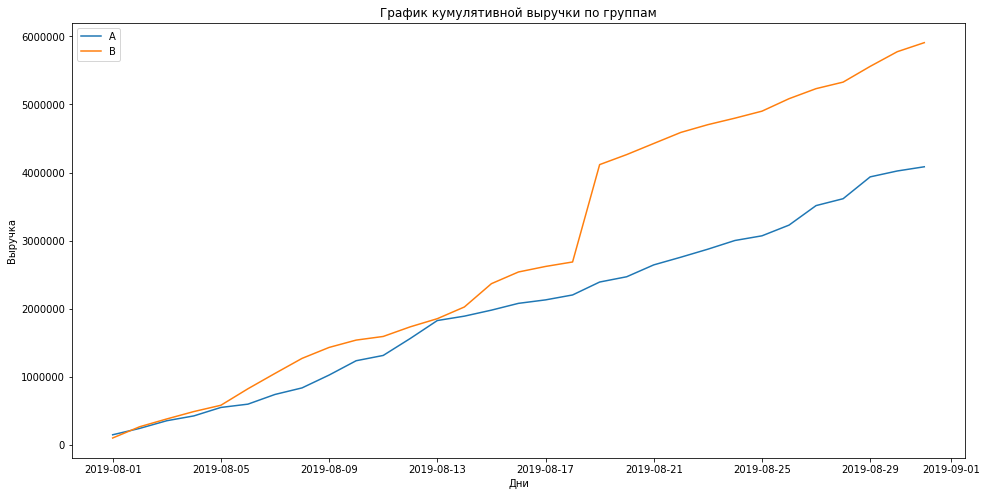

In [23]:
plt.figure(figsize=(16,8))
plt.xlabel('Дни')
plt.ylabel('Выручка')
plt.title('График кумулятивной выручки по группам')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend();

**Выводы**: В середине теста группа B вырвалась вперед и продолжада лидировать. Скачок достаточно резкий, вероятно, дело в крупном заказе и нужно проверить выбросы.

#### *Построим график кумулятивного среднего чека по группам.* <a id="step2.2"></a>   

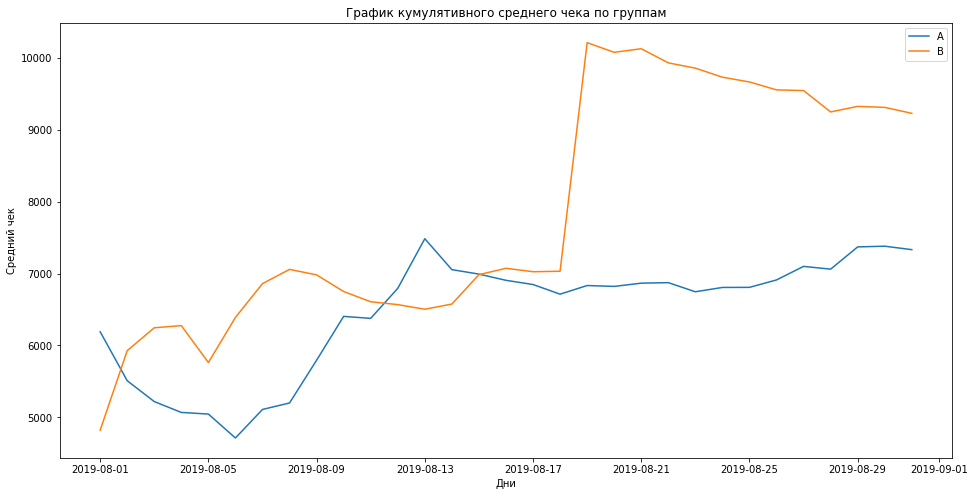

In [24]:
plt.figure(figsize=(16,8))
plt.xlabel('Дни')
plt.ylabel('Средний чек')
plt.title('График кумулятивного среднего чека по группам')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend();

**Выводы**: В середине теста группа B и по этому показателю вырвалась вперед и продолжада лидировать. Средний чек вырос значительно (с 7000 до 10000). Здесь тоже стоит проверить выбросы и отбросить аномально крупные покупки.

#### *Построим график относительного изменения кумулятивного среднего чека группы B к группе A.* <a id="step2.3"></a>   

In [25]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

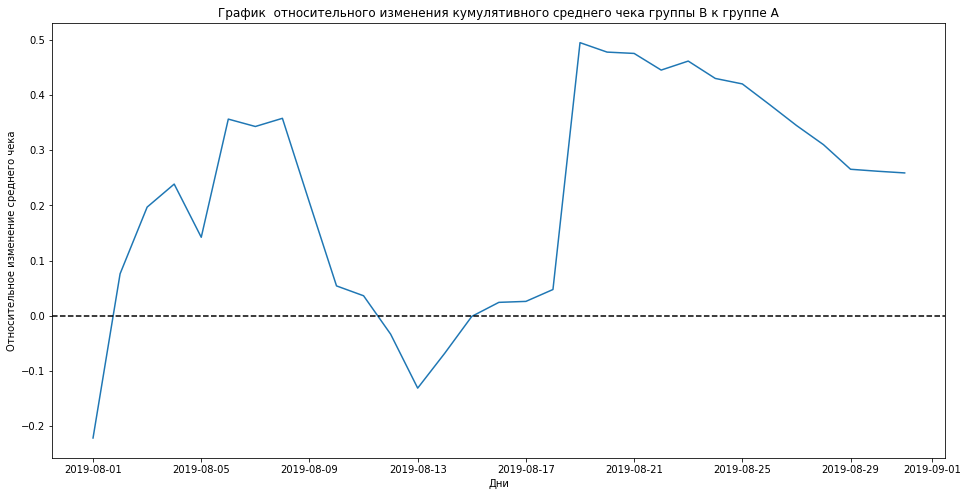

In [26]:
plt.figure(figsize=(16,8))
plt.xlabel('Дни')
plt.ylabel('Относительное изменение среднего чека')
plt.title('График  относительного изменения кумулятивного среднего чека группы B к группе A')
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--');

**Выводы**: В нескольких точках график различия сильно скачет, нужно проверить, не было ли крупных заказов и выбросов в эти даты.

#### *Построим график кумулятивной конверсии по группам.* <a id="step2.4"></a>   

In [27]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

In [28]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

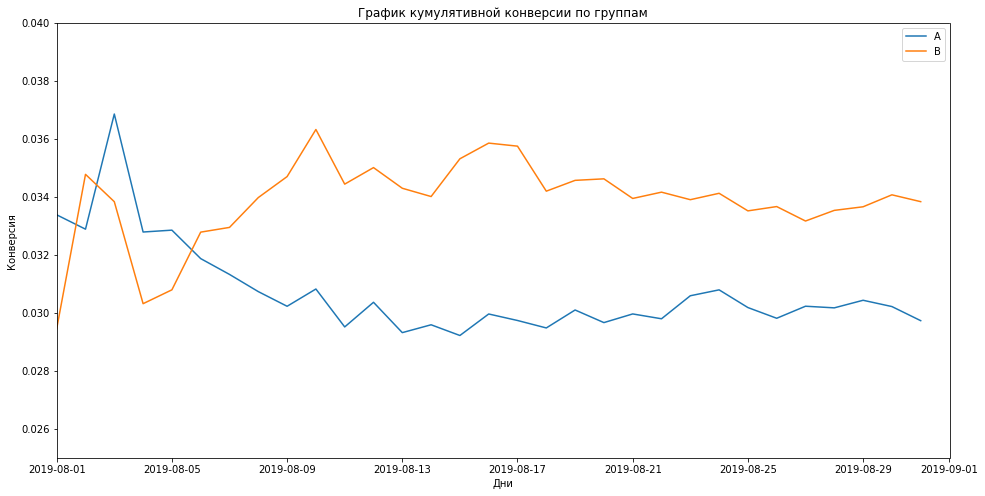

In [29]:
plt.figure(figsize=(16,8))
plt.xlabel('Дни')
plt.ylabel('Конверсия')
plt.title('График кумулятивной конверсии по группам')
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.axis(['2019-08-01', '2019-09-01', 0.025, 0.04])
plt.legend();

**Выводы**: Конверсия группы B вырвалась вперёд и зафиксировалась.

#### *Построим график относительного изменения кумулятивной конверсии группы B к группе A.* <a id="step2.5"></a>   

In [30]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

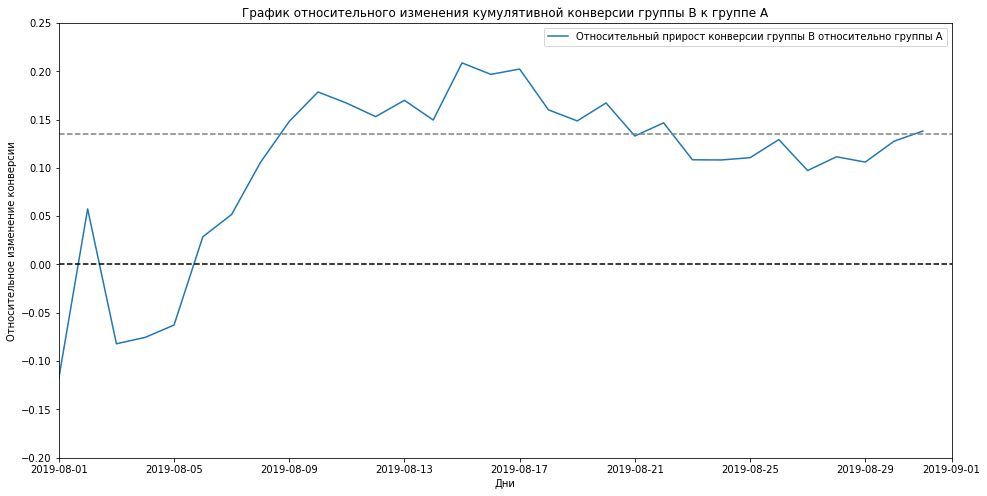

In [31]:
plt.figure(figsize=(16,8))
plt.xlabel('Дни')
plt.ylabel('Относительное изменение конверсии')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.135, color='grey', linestyle='--')
plt.axis(['2019-08-01', '2019-09-01', -0.2, 0.25])
plt.legend();

**Выводы**: В начале теста группа B проигрывала группе A, затем вырвалась вперёд и остаётся примерно на одном уровне. 

#### *Построим точечный график количества заказов по пользователям.* <a id="step2.6"></a>   

In [32]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['visitorId','orders']

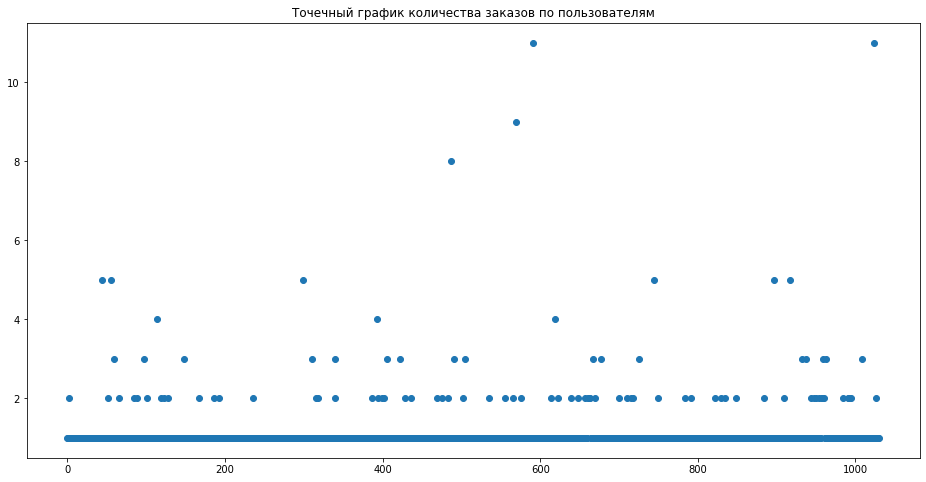

In [33]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(16,8))
plt.title('Точечный график количества заказов по пользователям')
plt.scatter(x_values, ordersByUsers['orders']);

**Выводы**: Пользователи редко совершали более 2 заказов. В данных есть выбросы.

#### *Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.* <a id="step2.7"></a>   

In [34]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

**Выводы**: Не более 5% пользователей совершали более 2 заказов. И не более 1% совершали более 4 заказов.

#### *Построим точечный график стоимостей заказов.* <a id="step2.8"></a>   

In [35]:
x_values = pd.Series(range(0,len(orders['revenue'])))

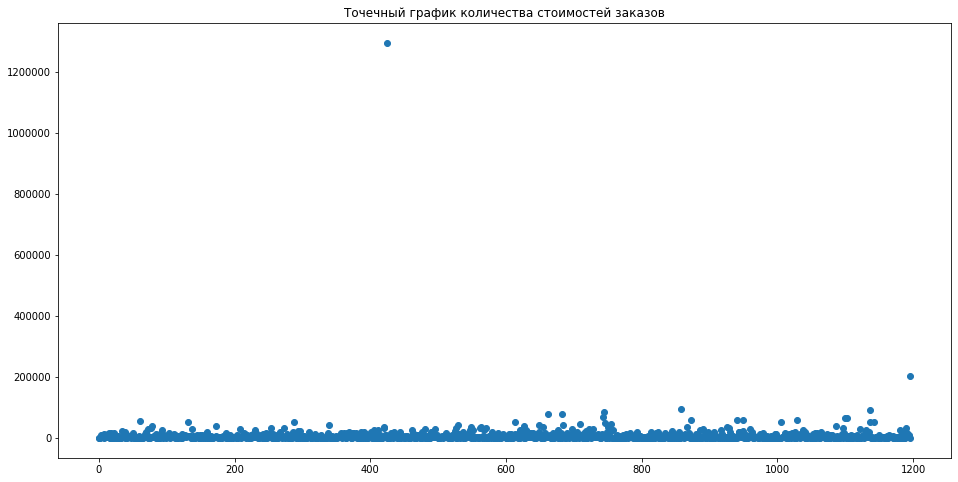

In [36]:
plt.figure(figsize=(16,8))
plt.title('Точечный график количества стоимостей заказов')
plt.scatter(x_values, orders['revenue']);

**Выводы**: Заказов стоимостью более 50000 практически нет. Есть аномальный выброс на сумму выше 1200000, от него нужно держаться в стороне, он существенно меняет картину.

#### *Посчитаем 95-й и 99-й перцентили стоимости заказов.* <a id="step2.9"></a>   

In [37]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

**Выводы**: Не более 5% заказов имели чек выше 280000. И не более 1% заказов превышали сумму в 58000.

#### *Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.* <a id="step2.10"></a>   

**Нулевая гипотеза**: по «сырым» данным в конверсии между группами нет статистически значимых различий.

**Альтернативная гипотеза**: по «сырым» данным в конверсии между группами есть статистически значимые различия.

In [38]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

In [39]:
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [40]:
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [41]:
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [42]:
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

In [43]:
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

In [44]:
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [45]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [46]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

In [47]:
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [48]:
ordersByUsersA = orders[orders['group']=='A'].groupby(
    'visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

In [49]:
ordersByUsersB = orders[orders['group']=='B'].groupby(
    'visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

In [50]:
sampleA = pd.concat(
    [ordersByUsersA['orders'],pd.Series(0, index=np.arange(
        data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

In [51]:
sampleB = pd.concat(
    [ordersByUsersB['orders'],pd.Series(0, index=np.arange(
        data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [52]:
print("{0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

0.00840


In [53]:
print("{0:.3f}".format(
    (data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(
        data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

0.138


**Выводы**: P-value значительно ниже 0.05. Значит, нулевую гипотезу отвергаем: в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы B к группе A составляет 13.8%

#### — *Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.* <a id="step2.11"></a>   

**Нулевая гипотеза**: по «сырым» данным в среднем чеке между группами нет статистически значимых различий.

**Альтернативная гипотеза**: по «сырым» данным в среднем чеке между группами есть статистически значимые различия.

In [54]:
print("{0:.3f}".format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

0.365


In [55]:
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.259


**Выводы**: P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек группы B значительно ниже выше чека группы A (на 25.9%).

#### *Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.* <a id="step2.12"></a>   

**Нулевая гипотеза**: по «очищенным» данным в конверсии между группами нет статистически значимых различий.

**Альтернативная гипотеза**: по «очищенным» данным в конверсии между группами есть статистически значимые различия.

In [56]:
usersWithManyOrders = pd.concat(
    [ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
     ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)

In [57]:
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']

In [58]:
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

In [59]:
sampleAFiltered = pd.concat(
    [ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
               name='orders')],axis=0)

In [60]:
sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],
     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
               name='orders')],axis=0)

In [61]:
print("{0:.5f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

0.00667


In [62]:
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.172


**Выводы**: Статистическая значимость достигнута, p-value значительно ниже 0.05. Конверсия группы B выше, чем у группы A на 17.2%

#### *Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.* <a id="step2.13"></a>   

**Нулевая гипотеза**: по «очищенным» данным в среднем чеке между группами нет статистически значимых различий.

**Альтернативная гипотеза**: по «очищенным» данным в среднем чеке между группами есть статистически значимые различия.

In [63]:
print("{0:.3f}".format(st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

0.360


In [64]:
print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

-0.023


**Выводы**: P-value совсем незначительно уменьшился, но всё так же не позволяет отвергнуть нулевую гипотезу и сказать, что различия в среднем чеке есть. В сырых данных средний чек группы B ниже, чем у группы A на 2.3%.

#### *Проанализируем результаты тестов* <a id="step2.14"></a>   

Результаты исследования:

— Были обнаружены аномально большие заказы по группе B, а также пользователи, которые совершили очень много заказов. Это влияло на показатели конверсии и среднего чека, поэтому в процессе ислледования очистили данные от выбросов.

— Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.

— Статистически значимого различия по среднему чеку между группами нет как по сырым данным, так и по очищенным. 

— График различия конверсии между группами говорит, что результаты группы B лучше группы A.

— График различия среднего чека сильно колеблется, влияют выбросы.

**Выводы**: Продолжать тест смысла нет: группа B статистически значимо лучше группы A по значению конверсии, а различий между средним чеком нет.